In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 10)

### Beta-binomial distributions

In [2]:
N = 10
c1 = 5
c2 = N - c1
alpha = 0.4
beta = 0.8

In [3]:
def beta_binomial(c1, alpha, beta):
    c2 = N - c1
    const = np.math.factorial(N) / (np.math.factorial(c1) * np.math.factorial(c2)) 
    num = sp.gamma(alpha + beta) * sp.gamma(c1 + alpha) * sp.gamma(c2 + beta)
    denom = sp.gamma(alpha) * sp.gamma(beta) * sp.gamma(c1 + c2 + alpha + beta)
    return (const * num) / denom

In [4]:
head_count = np.linspace(0, N, 11)

In [5]:
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
for count in head_count:
    y1.append(beta_binomial(count, alpha, beta))
    y2.append(beta_binomial(count, 1, 1))    
    y3.append(beta_binomial(count, 2, 3))    
    y4.append(beta_binomial(count, 2, 2))    
    y5.append(beta_binomial(count, 0.5, 0.5))    

[]

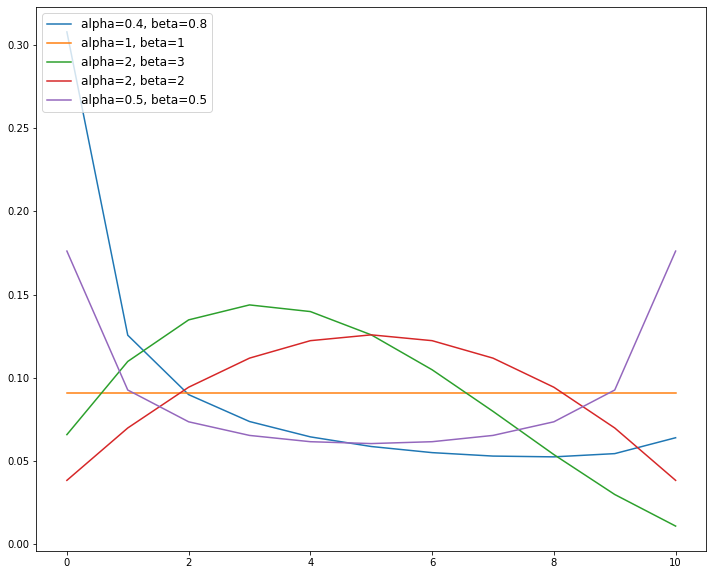

In [6]:
plt.plot(head_count, y1, label=f"alpha={alpha}, beta={beta}")
plt.plot(head_count, y2, label="alpha=1, beta=1")
plt.plot(head_count, y3, label="alpha=2, beta=3")
plt.plot(head_count, y4, label="alpha=2, beta=2")
plt.plot(head_count, y5, label="alpha=0.5, beta=0.5")
plt.legend(loc=2, prop={'size': 12})
plt.plot()

### Binomial Posterior Distributions

In [ ]:
def beta(prob, alpha, beta):
    const = sp.gamma(alpha + beta) / (sp.gamma(alpha) * sp.gamma(beta))
    num = prob**(alpha - 1) * (1 - prob)**(beta -1)
    return const * num

In [7]:
def binomial_posterior(prob, alpha, beta, c1):
    c2 = N - c1
    const = sp.gamma(c1 + c2 + alpha + beta) / (sp.gamma(c1 + alpha) * sp.gamma(c2 + beta))
    num = prob**(c1 + alpha - 1) * (1 - prob)**(c2 + beta -1)
    return const * num

In [8]:
probability = np.linspace(0, 1, 10)

In [22]:
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
alpha = 0.5
beta = 6
for prob in probability:
    y1.append(binomial_posterior(prob, alpha, beta, 5))
    y2.append(binomial_posterior(prob, alpha, beta, 10))    
    y3.append(binomial_posterior(prob, alpha, beta, 3))    
    y4.append(binomial_posterior(prob, alpha, beta, 8))    
    y5.append(binomial_posterior(prob, alpha, beta, 6))    

[]

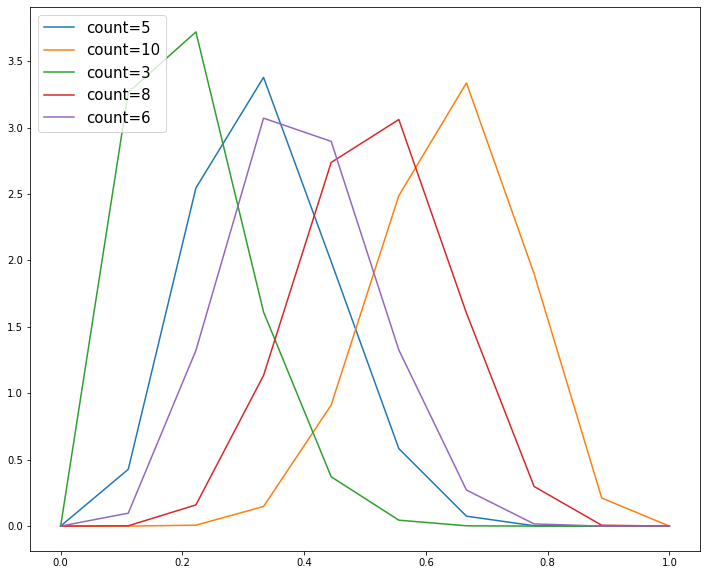

In [23]:
plt.plot(probability, y1, label=f"count=5")
plt.plot(probability, y2, label="count=10")
plt.plot(probability, y3, label="count=3")
plt.plot(probability, y4, label="count=8")
plt.plot(probability, y5, label="count=6")
plt.legend(loc=2, prop={'size': 15})
plt.plot()